In [19]:
import pandas as pd
df=pd.read_csv("c:/data/concrete/concrete.csv")
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [20]:
train_cols = ['flag', 'ash', 'water', 'superplastic','coarseagg', 'findagg', 'age','strength']
print(train_cols)
X=df[train_cols]
y=df["class"]

['flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age', 'strength']


In [21]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [22]:
df2['class'].value_counts()

0    507
1    507
Name: class, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [25]:
print("학습용:",model1.score(X_train, y_train)) 
print("검증용:",model1.score(X_test, y_test)) 

학습용: 1.0
검증용: 0.9854368932038835


In [26]:
model1.decision_function(X_test)

array([-68.80585358, -14.81967039, -77.39874665,   2.67248186,
        19.21889868,  56.88913446,  31.87732286,  58.18831784,
        18.60877701, -70.39950882, -18.7523628 ,  14.11722764,
       -15.92391298,  73.11345164, -33.12975913,  92.48968118,
       -12.59409515,  45.59848328,  -4.83088037, -83.80137891,
        -9.00202331,   6.74578327,  53.81091496, -44.4750237 ,
         6.76034326, -67.56782195, -57.13272004, -50.26178816,
        42.58734166,  -8.04701805, 105.66418882,  17.77849219,
         9.23318079,  68.04063787,  -4.46290341,  28.9996489 ,
       -65.66258724,  11.49516186,   3.28585258,  30.5880155 ,
       -13.53368091, 100.23748855,  82.95255413, -65.96729499,
       -34.75382958, -61.89758046,   8.6105978 ,  20.24211492,
       -28.2494478 , -67.33930964,  -0.8179203 ,  13.28872035,
       -10.39032055,  11.05961387,  14.34057879, -87.30486231,
        27.86989087,  76.58372175,  -3.59904236, 107.02903376,
       -96.87039434, 121.88932784, -70.22151131,  75.01

In [27]:
from sklearn.svm import SVC
model2=SVC(random_state=0)
model2.fit(X_train, y_train)

SVC(random_state=0)

In [28]:
print("학습용:",model2.score(X_train, y_train)) 
print("검증용:",model2.score(X_test, y_test)) 

학습용: 0.8410194174757282
검증용: 0.8058252427184466


In [29]:
model2.decision_function(X_test)

array([-1.34693068e+00, -5.77033054e-01, -1.19073248e+00, -3.74141828e-01,
       -3.31613634e-01,  4.33336564e-01,  2.45347364e-01,  2.36404180e-01,
        1.78024849e-01, -1.12581678e+00, -5.49515624e-01,  4.32998953e-01,
       -1.70292060e-02,  5.41544568e-01, -2.00770266e-01,  1.04200806e+00,
       -2.66077175e-02,  1.12210120e-03, -1.34305147e-01, -6.71139486e-01,
       -1.74867211e-01, -3.00953972e-01, -3.10671749e-01, -5.43861558e-01,
        4.80339215e-02, -8.47147344e-01, -1.02784725e+00, -7.61739301e-01,
        2.92520207e-01,  1.76888048e-01,  1.28033310e+00,  8.53501468e-01,
        2.34367568e+00,  4.89602880e-01,  1.01211209e-01,  2.52745280e+00,
       -9.60300059e-01,  2.03372086e-01,  3.08894789e-01,  3.19907064e+00,
       -6.69461086e-01,  1.18320533e+00,  1.98316460e-01, -1.18109497e+00,
       -5.19510714e-01, -1.02737153e+00,  3.90374991e-01,  6.41335344e-02,
       -3.21125229e-01, -1.01629192e+00, -6.12157656e-01, -3.02051918e-01,
       -3.84198476e-01, -

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr1,tpr1,thresholds1=roc_curve(y,model1.decision_function(X))
fpr2,tpr2,thresholds1=roc_curve(y,model2.decision_function(X))

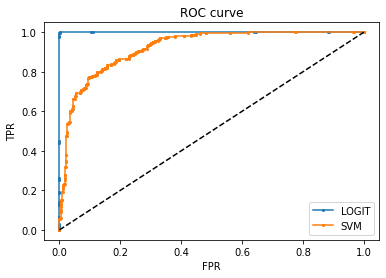

In [31]:
plt.plot(fpr1,tpr1,'o-',ms=2,label="LOGIT")
plt.plot(fpr2,tpr2,'o-',ms=2,label="SVM")
plt.legend()
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [32]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9999886861189994, 0.9225979687812309)